In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn import metrics
from prophet.plot import plot_yearly

Importing plotly failed. Interactive plots will not work.


In [2]:
dataset = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
dataset

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
dataset.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [5]:
#checking for null value
dataset.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
#checking for correlation
dataset.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
ElecPrice,0.002126,0.138690,0.157768,1.000000


In [7]:
#converting our date column
dataset['FullDate'] = pd.to_datetime(dataset['FullDate'])
dataset = dataset.set_index('FullDate')

In [8]:
dataset

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [9]:
day_data = dataset.resample('D').sum()

In [10]:
day_data.shape

(3834, 4)

Text(0, 0.5, 'Electric Price')

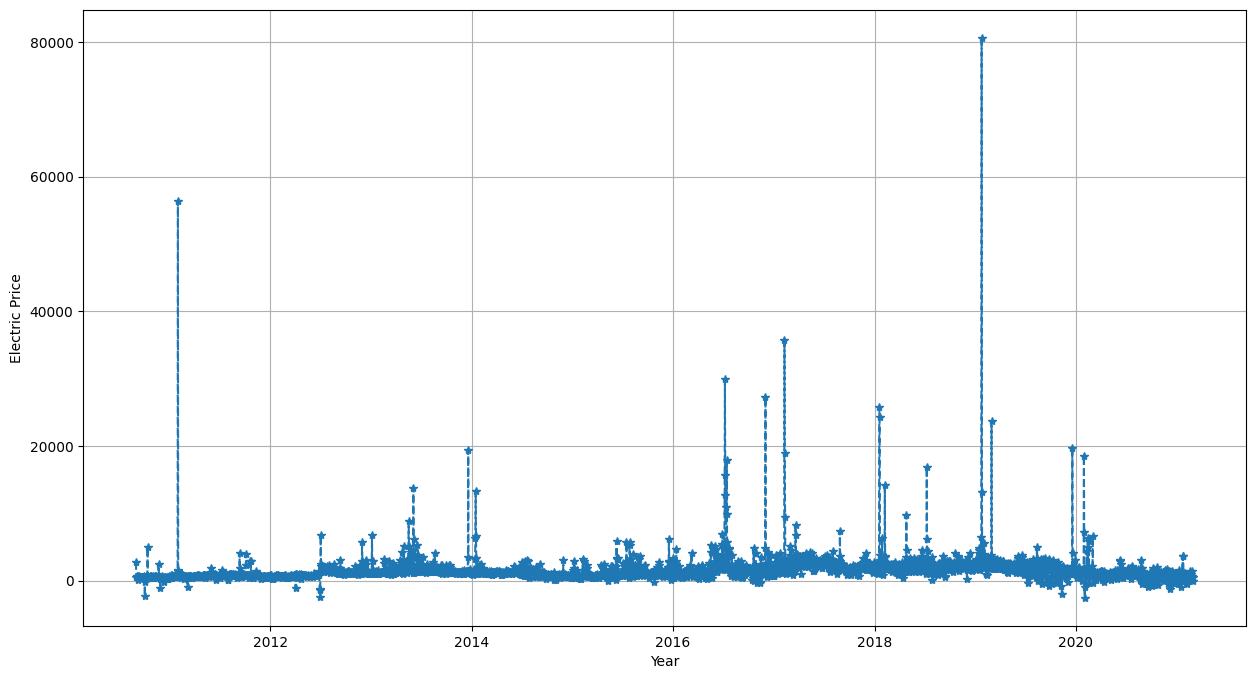

In [11]:
plt.figure(figsize=( 15 , 8 ))
plt.plot(day_data.index, day_data['ElecPrice'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

In [12]:
#P-value of sysload and gas price to 6 d.p
sys = adfuller(day_data['SysLoad'])
gas = adfuller(day_data['GasPrice'])

print(f'p-value: {round(sys[1],6)}')
print(f'p-value: {round(gas[1],6)}')

p-value: 0.004254
p-value: 0.045027


In [13]:

# Initially reseting the index

train_data = day_data.iloc[:2757,:]
test_data = day_data.iloc[2757:,:]

In [14]:
train_data.reset_index(inplace = True)
train_data.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [15]:
data_train = train_data.iloc[:,[0,-1]]
data_train = data_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
data_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [16]:
#looking for critical values
elecprice = adfuller(data_train['y'])
round(gas[4]['10%'],4), round(elecprice[4]['5%'],4)

(-2.5672, -2.8626)

In [17]:
test_data.reset_index(inplace = True)
test_data.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [18]:
data_test = test_data.iloc[:,[0,-1]]
data_test = data_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
data_test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [19]:
test_data = test_data.iloc[:,[0,-1]]

In [20]:
test_data = test_data.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_data.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [21]:
model = Prophet()
model.fit(data_train)

14:50:08 - cmdstanpy - INFO - Chain [1] start processing
14:50:08 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
forecast = model.predict(data_test) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2679.523236,174.458938,4901.866733,2679.523236,2679.523236,-154.882441,-154.882441,-154.882441,9.737801,9.737801,9.737801,-164.620241,-164.620241,-164.620241,0.0,0.0,0.0,2524.640796
1,2018-03-21,2680.298031,212.340162,5199.502232,2680.298031,2680.298031,-2.419802,-2.419802,-2.419802,159.363178,159.363178,159.363178,-161.782980,-161.782980,-161.782980,0.0,0.0,0.0,2677.878229
2,2018-03-22,2681.072826,341.730408,5188.198958,2681.072826,2681.072826,95.746291,95.746291,95.746291,257.127937,257.127937,257.127937,-161.381646,-161.381646,-161.381646,0.0,0.0,0.0,2776.819117
3,2018-03-23,2681.847620,252.597980,4944.276338,2681.847620,2681.847620,-112.972998,-112.972998,-112.972998,50.277336,50.277336,50.277336,-163.250334,-163.250334,-163.250334,0.0,0.0,0.0,2568.874622
4,2018-03-24,2682.622415,7.455192,4551.081934,2682.622415,2682.622415,-438.612511,-438.612511,-438.612511,-271.465795,-271.465795,-271.465795,-167.146716,-167.146716,-167.146716,0.0,0.0,0.0,2244.009904


In [23]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100



In [24]:
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [25]:
#running evaluation on our model
MAPE = Metric(test_data['y'],forecast['yhat'])
round(MAPE,2)


540.82

In [26]:
#checking for RMSE

def rmse(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.sqrt(np.mean(np.square(y - yhat))),2)

# evaluate rmse
rmse(test_data['y'],forecast['yhat'])

3200.06

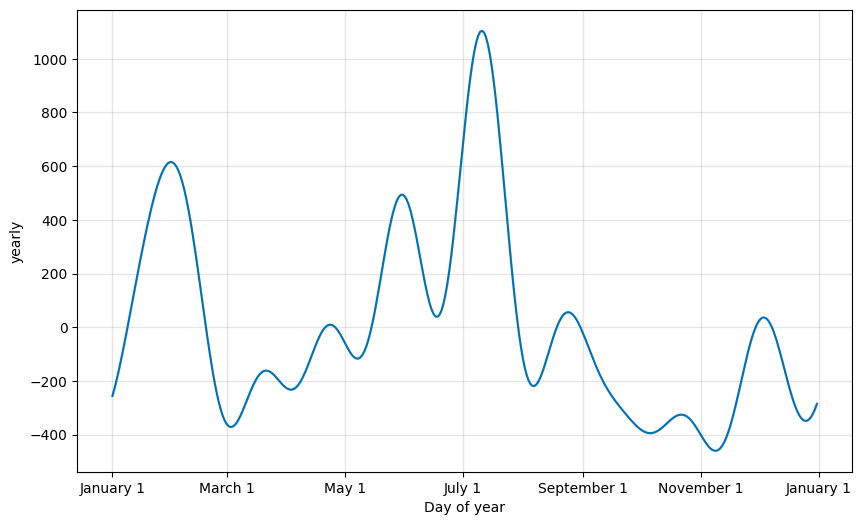

In [27]:
#plotting to see month of yearly seasonality with highest value
plot_yearly(model)


In [28]:
dataset.reset_index(inplace = True)
dataset.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [29]:
data = dataset.reset_index().rename(columns={"FullDate": "ds", "ElecPrice": "y", 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'})

data.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [30]:
data.reset_index(inplace= True)
train_new = data.iloc[:2757,:]
test_new = data.iloc[2757:,:]


In [31]:
model_2 = Prophet()
model_2.add_regressor('add1')
model_2.add_regressor('add2')
model_2.add_regressor('add3')

In [32]:
#training new model
model_21 = model_2.fit(train_new)

14:50:09 - cmdstanpy - INFO - Chain [1] start processing
14:50:10 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
new_forecast = model_21.predict(test_new)

In [34]:
#evaluating MAPE of new model
MAPE_2 = mape(test_new['y'],new_forecast['yhat'])
round(MAPE_2,2)



inf

In [35]:
#calculating new RMSE
RMSE_3 = np.sqrt(metrics.mean_squared_error(test_new['y'],new_forecast['yhat']))
round(RMSE_3,2)

1331.71

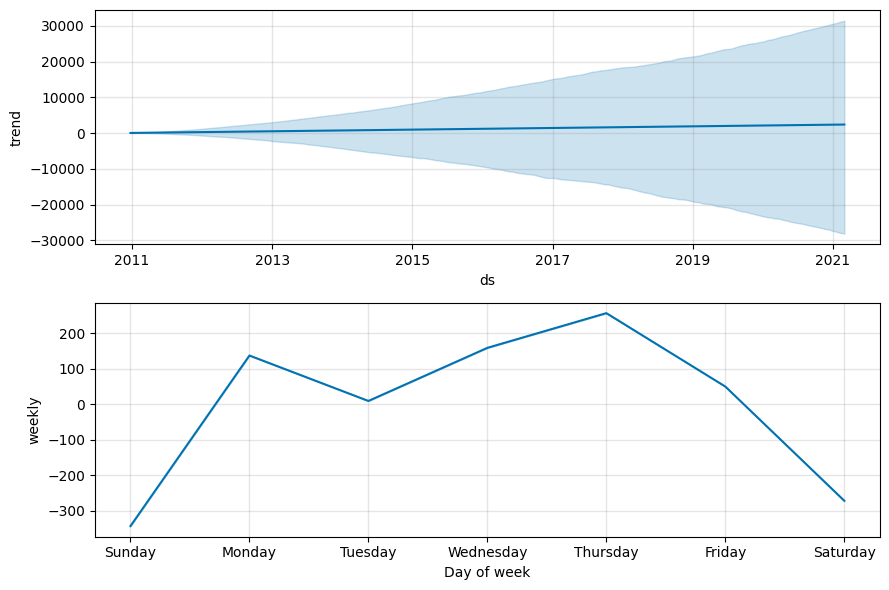

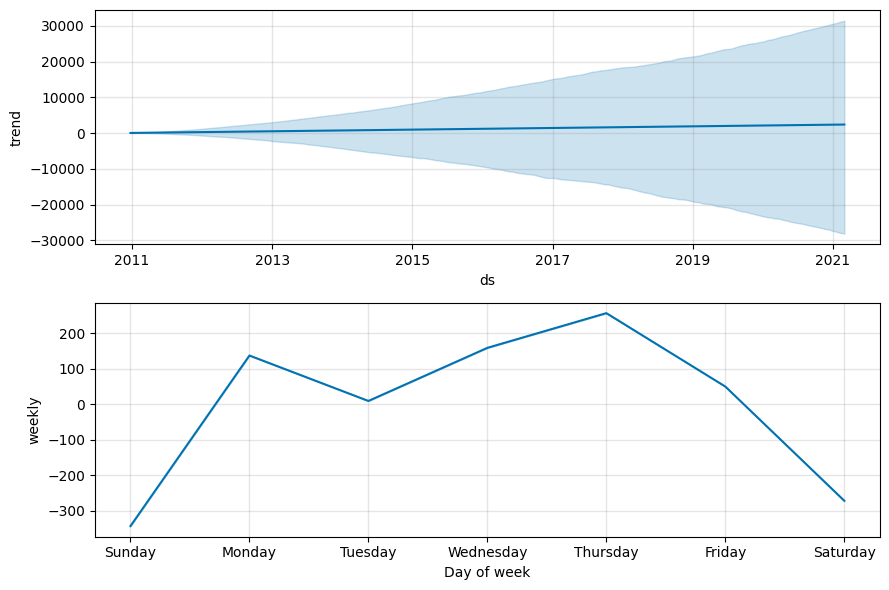

In [36]:
#plotting to see daily seasonality with the highest value
model.plot_components(new_forecast)

In [37]:
#initialising a new dataset to train a multivariate time series excluding T-max
new_data = dataset.rename(columns = {'FullDate':'ds','ElecPrice':'y','SysLoad':'add1','GasPrice':'add2'})
new_data.drop('Tmax', axis=1,inplace=True)

new_data.head()

,ds,add1,add2,y
0,2010-09-01 00:00:00,1688.215,3.69,23.710
1,2010-09-01 01:00:00,1669.195,3.69,22.635
2,2010-09-01 02:00:00,1491.980,3.69,22.565
3,2010-09-01 03:00:00,1330.760,3.69,18.910
4,2010-09-01 04:00:00,1247.940,3.69,18.030


In [38]:
#splitting the data
train1 = new_data[:2757]
test1 = new_data[2757:]

In [39]:
#training the model
model1 = Prophet()
model1.add_regressor('add1')
model1.add_regressor('add2')

In [40]:
model1.fit(train1) 
forecast1 = model1.predict(test1)

14:50:34 - cmdstanpy - INFO - Chain [1] start processing
14:50:35 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
#getting the MAPE for the new model 
MAPE_4 = Metric(test1['y'],forecast1['yhat'])
round(MAPE_4,2)

C:\Users\godso\AppData\Local\Temp\ipykernel_7684\3617687093.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100


inf